# Decision Tree Classifier

In [114]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = sns.load_dataset('iris')

In [116]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [118]:
df['species'] = df['species'].map({'setosa':1,'virginica':0,'versicolor':1})

In [119]:
df['species'].unique()

array([1, 0], dtype=int64)

In [120]:
df.shape

(150, 5)

In [121]:
df.dropna(inplace=True)

In [122]:
df.shape

(150, 5)

In [123]:
df['species'].unique()

array([1, 0], dtype=int64)

In [124]:
df['species'].count

<bound method Series.count of 0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: int64>

# splitting dataset

In [125]:
from sklearn.model_selection import train_test_split

# dependent and independent dataste

In [126]:
X = df.iloc[: ,:-1]

In [127]:
y = df.iloc[: ,-1:]

In [128]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [129]:
y.head()

,species
0,1
1,1
2,1
3,1
4,1


In [130]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=43)

In [131]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

# Model Trainig 

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
treeclass = DecisionTreeClassifier()

In [134]:
treeclass.fit(X_train,y_train)

DecisionTreeClassifier()

In [135]:
treeclass.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

# Creating Decision tree

In [136]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclass,filled = True)

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

[Text(0.45454545454545453, 0.9166666666666666, 'x[2] <= 4.85\ngini = 0.45\nsamples = 120\nvalue = [41, 79]'),
 Text(0.18181818181818182, 0.75, 'x[3] <= 1.65\ngini = 0.026\nsamples = 76\nvalue = [1, 75]'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(0.2727272727272727, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7272727272727273, 0.75, 'x[3] <= 1.75\ngini = 0.165\nsamples = 44\nvalue = [40, 4]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.5454545454545454, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7272727272727273, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.63636363636363

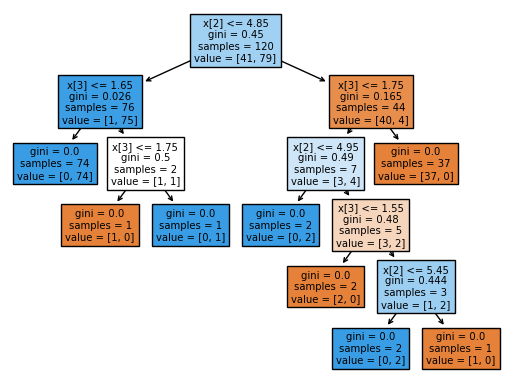

# Post Pruning with max_depth =2

In [139]:
treeclass1 = DecisionTreeClassifier(max_depth = 2)

In [140]:
treeclass1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [141]:
treeclass.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

[Text(0.5, 0.8333333333333334, 'x[2] <= 4.85\ngini = 0.45\nsamples = 120\nvalue = [41, 79]'),
 Text(0.25, 0.5, 'x[3] <= 1.65\ngini = 0.026\nsamples = 76\nvalue = [1, 75]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.5, 'x[3] <= 1.75\ngini = 0.165\nsamples = 44\nvalue = [40, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]')]

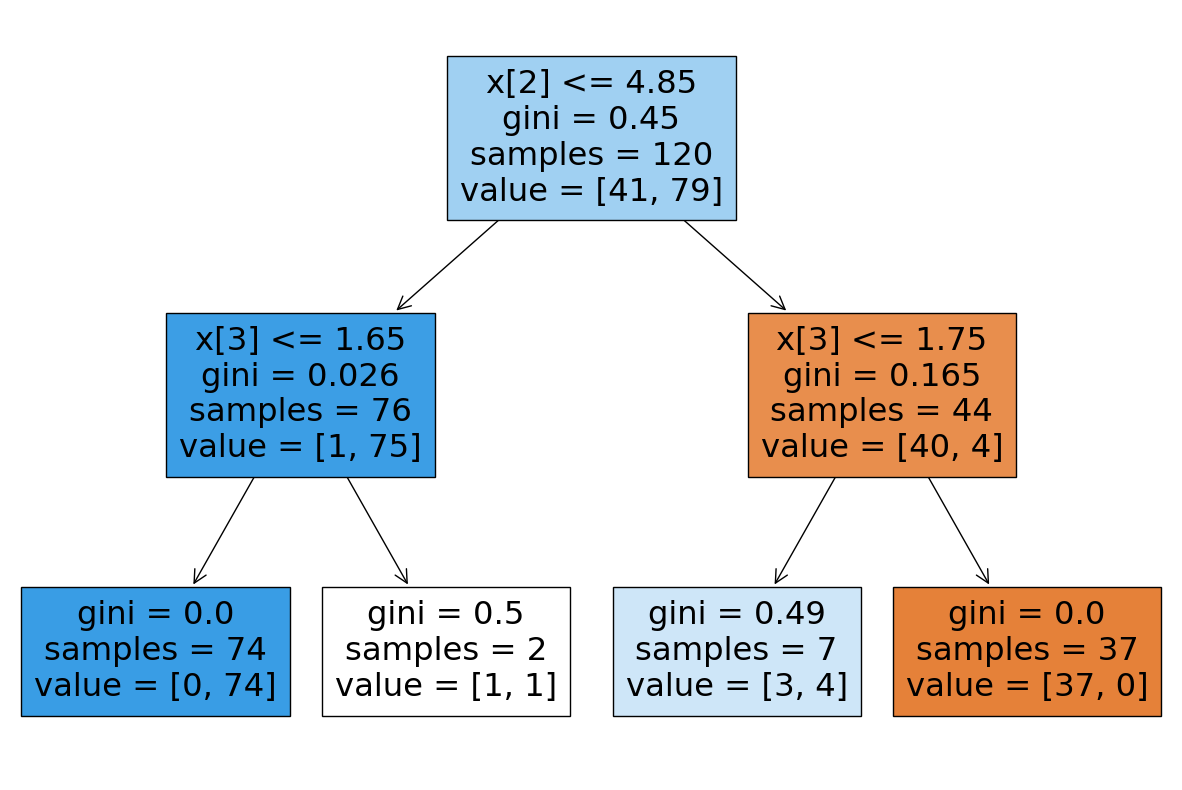

In [142]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclass1,filled = True)

# Preprunnig using Hyperparameter Tunning

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
treeclass2 = DecisionTreeClassifier()

# criterion : {"gini", "entropy", "log_loss"}
# splitter : {"best", "random"},
# max_depth : {1,2,3}

In [154]:
parameter = {'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_depth':[1,2,3]}

In [155]:
cls = GridSearchCV(treeclass2,param_grid=parameter, cv =5)

In [159]:
cls.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [160]:
cls.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [162]:
# Now train the model using there parameter to get the best decision tree
# {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [164]:
treeclass3 = DecisionTreeClassifier(criterion='gini',max_depth=2,splitter='best')

In [165]:
treeclass3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [166]:
y_pred = treeclass3.predict(X_test)

In [167]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

[Text(0.5, 0.8333333333333334, 'x[2] <= 4.85\ngini = 0.45\nsamples = 120\nvalue = [41, 79]'),
 Text(0.25, 0.5, 'x[3] <= 1.65\ngini = 0.026\nsamples = 76\nvalue = [1, 75]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.5, 'x[3] <= 1.75\ngini = 0.165\nsamples = 44\nvalue = [40, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]')]

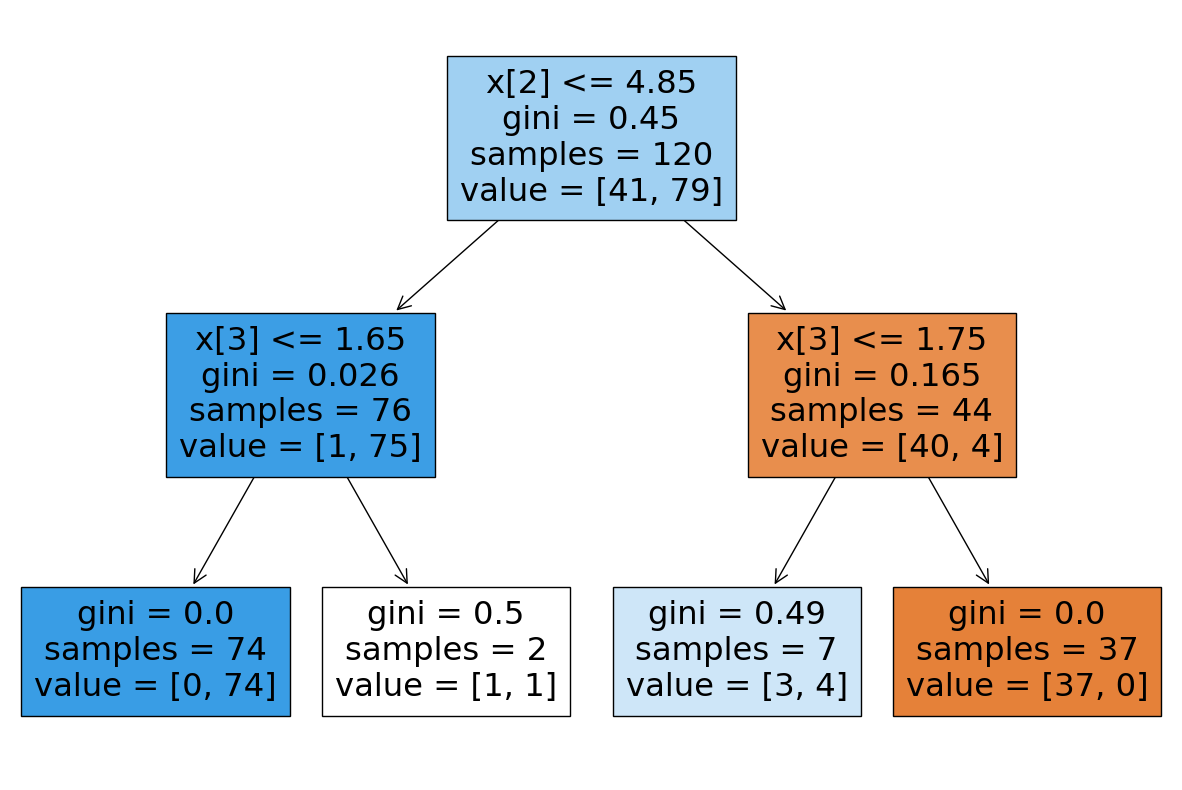

In [168]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclass3,filled = True)

In [169]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [170]:
confusion_matrix(y_pred,y_test)

array([[ 8,  0],
       [ 1, 21]], dtype=int64)

In [171]:
accuracy_score(y_pred,y_test)

0.9666666666666667

In [172]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94         8\n           1       1.00      0.95      0.98        22\n\n    accuracy                           0.97        30\n   macro avg       0.94      0.98      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'